<a href="https://colab.research.google.com/github/7330717512/The-Sparks-Foundation-Tasks/blob/main/Stock_Price_prediction_using_ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/NVDA.csv')

In [ ]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,20.129999,20.280001,19.809999,20.129999,19.374790,2842000
1,2015-01-05,20.129999,20.190001,19.700001,19.790001,19.047548,4948800
2,2015-01-06,19.820000,19.840000,19.170000,19.190001,18.470057,4944100
3,2015-01-07,19.330000,19.500000,19.080000,19.139999,18.421932,8045200
4,2015-01-08,19.360001,19.980000,19.350000,19.860001,19.114916,7094500


In [ ]:
data.isna().any()

Date         False
Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

In [ ]:
data.drop_duplicates()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,20.129999,20.280001,19.809999,20.129999,19.374790,2842000
1,2015-01-05,20.129999,20.190001,19.700001,19.790001,19.047548,4948800
2,2015-01-06,19.820000,19.840000,19.170000,19.190001,18.470057,4944100
3,2015-01-07,19.330000,19.500000,19.080000,19.139999,18.421932,8045200
4,2015-01-08,19.360001,19.980000,19.350000,19.860001,19.114916,7094500
...,...,...,...,...,...,...,...
1505,2020-12-23,530.239990,531.000000,520.200012,520.369995,520.369995,4478600
1506,2020-12-24,521.489990,525.299988,517.549988,519.750000,519.750000,2447100
1507,2020-12-28,522.500000,522.500000,510.529999,516.000000,516.000000,5314100
1508,2020-12-29,517.000000,522.900024,513.690002,517.729980,517.729980,4259300


In [ ]:
data['Date'] = pd.to_datetime(data['Date']).dt.normalize()

In [ ]:
data.set_index('Date', inplace= True)

In [ ]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,20.129999,20.280001,19.809999,20.129999,19.374790,2842000
2015-01-05,20.129999,20.190001,19.700001,19.790001,19.047548,4948800
2015-01-06,19.820000,19.840000,19.170000,19.190001,18.470057,4944100
2015-01-07,19.330000,19.500000,19.080000,19.139999,18.421932,8045200
2015-01-08,19.360001,19.980000,19.350000,19.860001,19.114916,7094500


In [ ]:
close_price = data['Close']

In [ ]:
close_price

Date
2015-01-02     20.129999
2015-01-05     19.790001
2015-01-06     19.190001
2015-01-07     19.139999
2015-01-08     19.860001
                 ...    
2020-12-23    520.369995
2020-12-24    519.750000
2020-12-28    516.000000
2020-12-29    517.729980
2020-12-30    525.830017
Name: Close, Length: 1510, dtype: float64

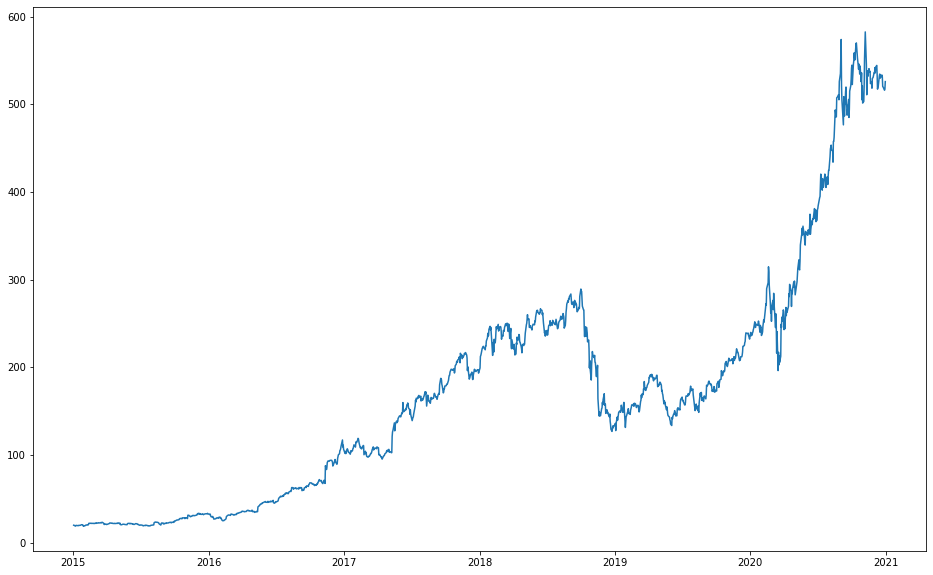

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,10))
plt.plot(close_price)

In [ ]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):


  #Determing rolling statistics
  rolmean = timeseries.rolling(60).mean()
  rolstd = timeseries.rolling(60).std()

  #Plot rolling statistics:
  plt.figure(figsize = (10,8))
  plt.plot(timeseries, color = 'y', label = 'original')
  plt.plot(rolmean, color = 'r', label = 'rolling mean')
  plt.plot(rolstd, color = 'b', label = 'rolling std')
  plt.xlabel('Date')
  plt.legend()
  plt.title('Rolling Mean and Standard Deviation',  fontsize = 20)
  plt.show(block = False)
  
  print('Results of dickey fuller test')
  result = adfuller(timeseries, autolag = 'AIC')
  labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
  for value,label in zip(result, labels):
    print(label+' : '+str(value) )
  if result[1] <= 0.05:
    print("Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
  else:
    print("Weak evidence against null hypothesis, time series is non-stationary ")

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


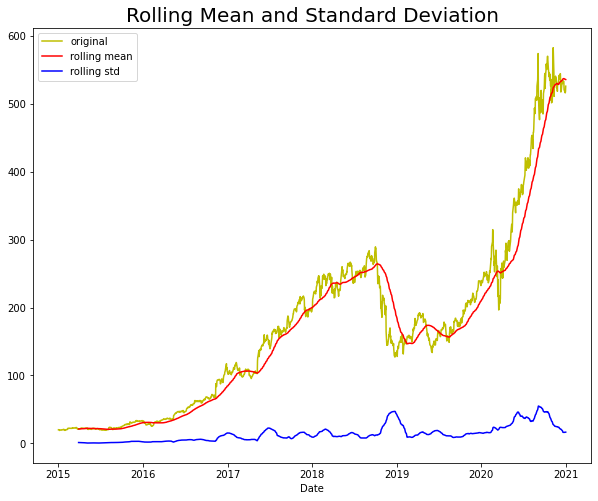

Results of dickey fuller test
ADF Test Statistic : 1.2700023635022888
p-value : 0.9964355801858087
#Lags Used : 16
Number of Observations Used : 1493
Weak evidence against null hypothesis, time series is non-stationary 


In [ ]:
test_stationarity(close_price)

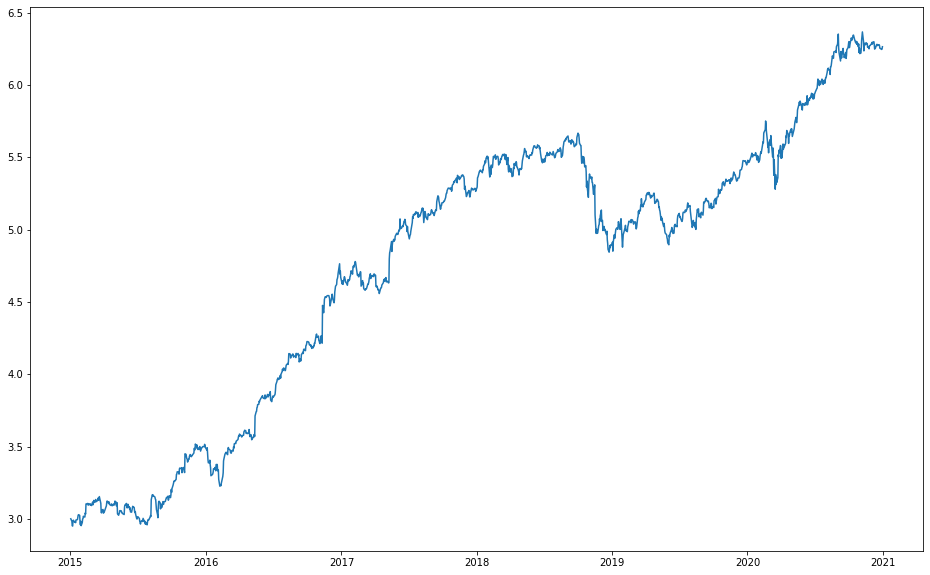

In [ ]:
data_log = np.log(close_price)
plt.figure(figsize=(16,10))
plt.plot(data_log)

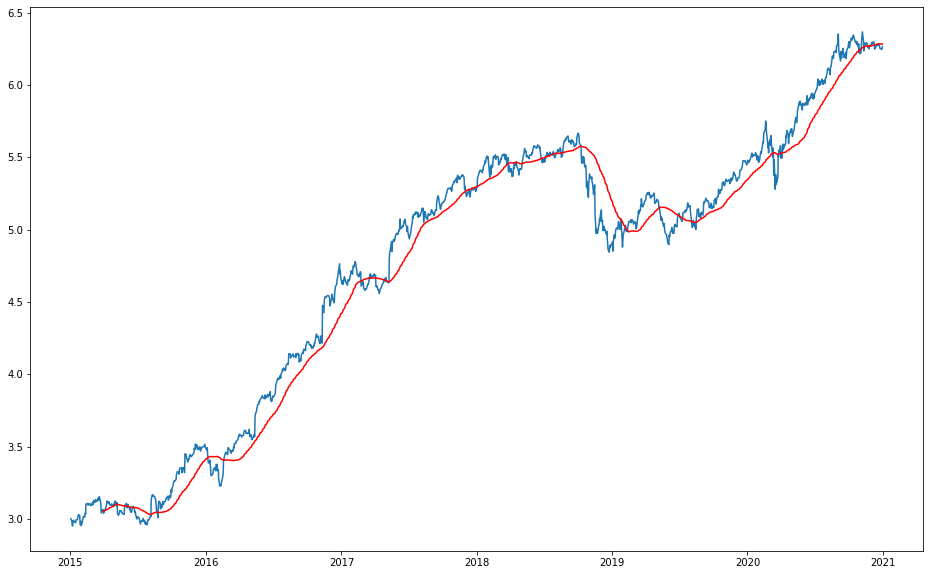

In [ ]:
moving_avg = data_log.rolling(window=60).mean()
plt.figure(figsize=(16,10))
plt.plot(data_log)
plt.plot(moving_avg, color='red')

In [ ]:
data_log_moving_avg_diff = data_log - moving_avg
data_log_moving_avg_diff

Date
2015-01-02         NaN
2015-01-05         NaN
2015-01-06         NaN
2015-01-07         NaN
2015-01-08         NaN
                ...   
2020-12-23   -0.030801
2020-12-24   -0.031319
2020-12-28   -0.037661
2020-12-29   -0.034162
2020-12-30   -0.018019
Name: Close, Length: 1510, dtype: float64

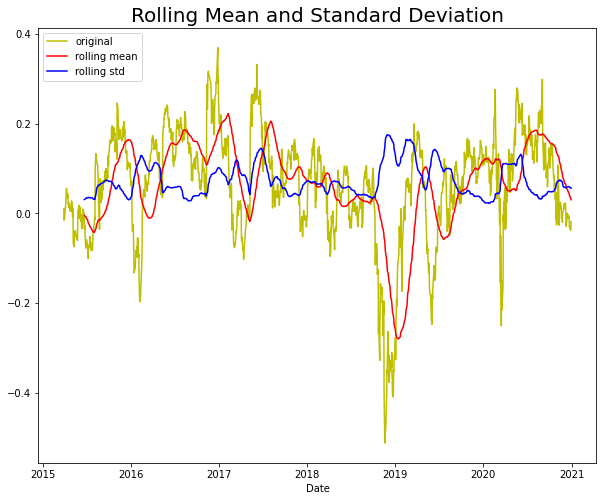

Results of dickey fuller test
ADF Test Statistic : -4.063539829476698
p-value : 0.001112009328374729
#Lags Used : 8
Number of Observations Used : 1442
Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary


In [ ]:
data_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(data_log_moving_avg_diff)

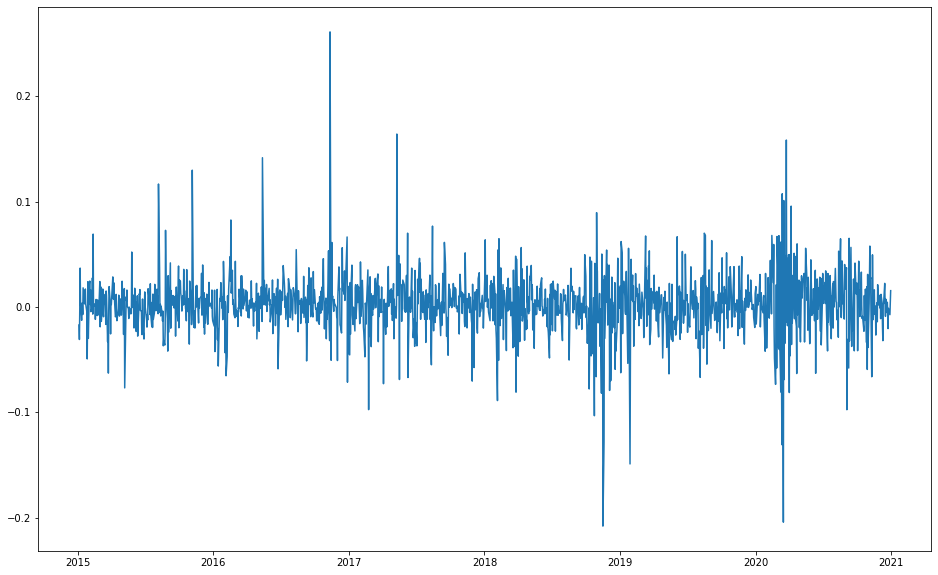

In [ ]:
data_log_diff = data_log - data_log.shift()
plt.figure(figsize=(16,10))
plt.plot(data_log_diff)

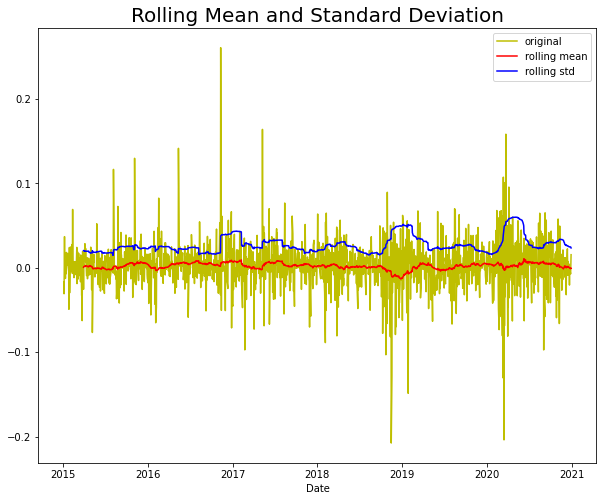

Results of dickey fuller test
ADF Test Statistic : -14.70232537105474
p-value : 2.9334619684748677e-27
#Lags Used : 7
Number of Observations Used : 1501
Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary


In [ ]:
data_log_diff.dropna(inplace=True)
test_stationarity(data_log_diff)

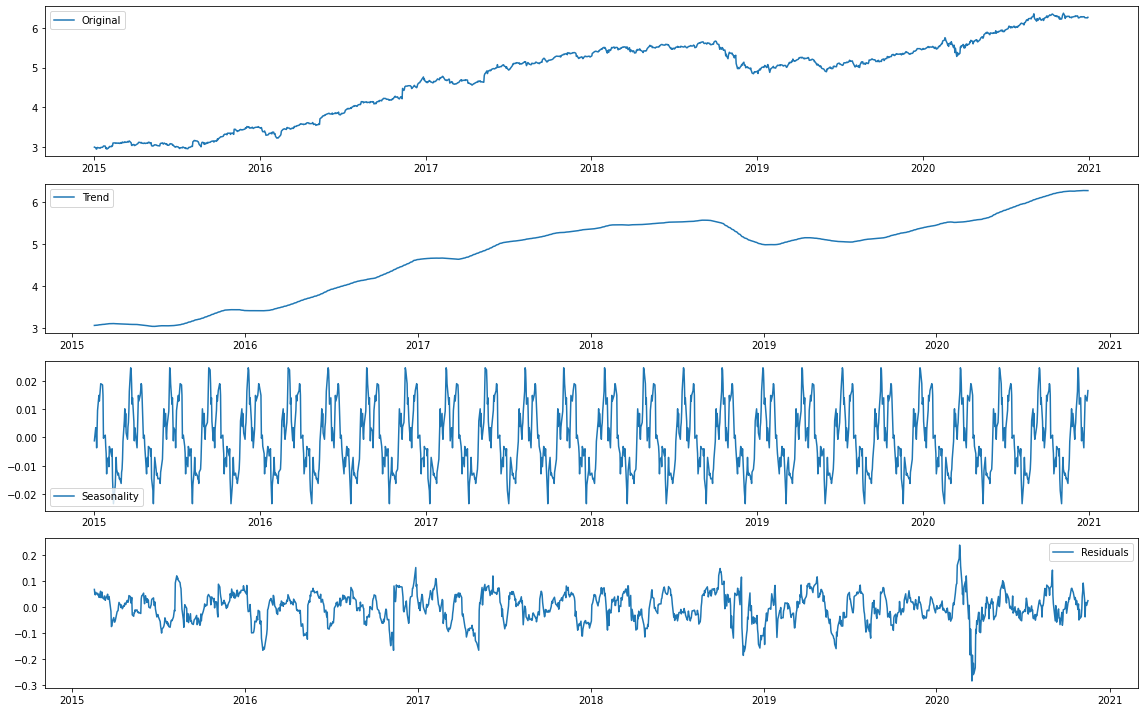

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(data_log,freq=60)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
plt.figure(figsize=(16,10))
plt.subplot(411)
plt.plot(data_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

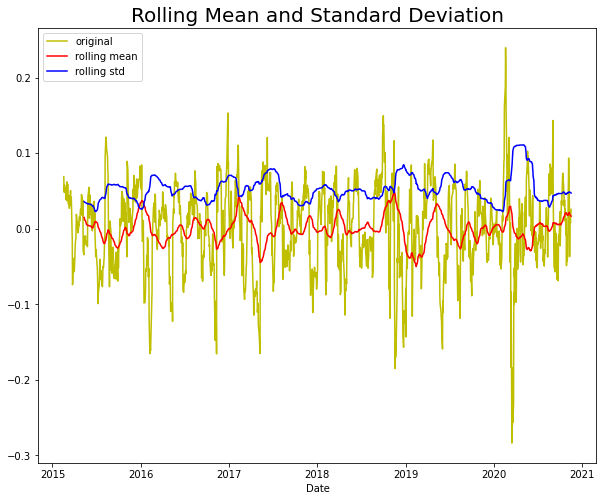

Results of dickey fuller test
ADF Test Statistic : -9.030149816242718
p-value : 5.472786792889052e-15
#Lags Used : 18
Number of Observations Used : 1431
Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary


In [ ]:
data_log_decompose = residual
data_log_decompose.dropna(inplace=True)
test_stationarity(data_log_decompose)

In [ ]:
from statsmodels.tsa.stattools import acf, pacf

In [ ]:
lag_acf = acf(data_log_diff, nlags=20)
lag_pacf = pacf(data_log_diff, nlags=20, method='ols')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


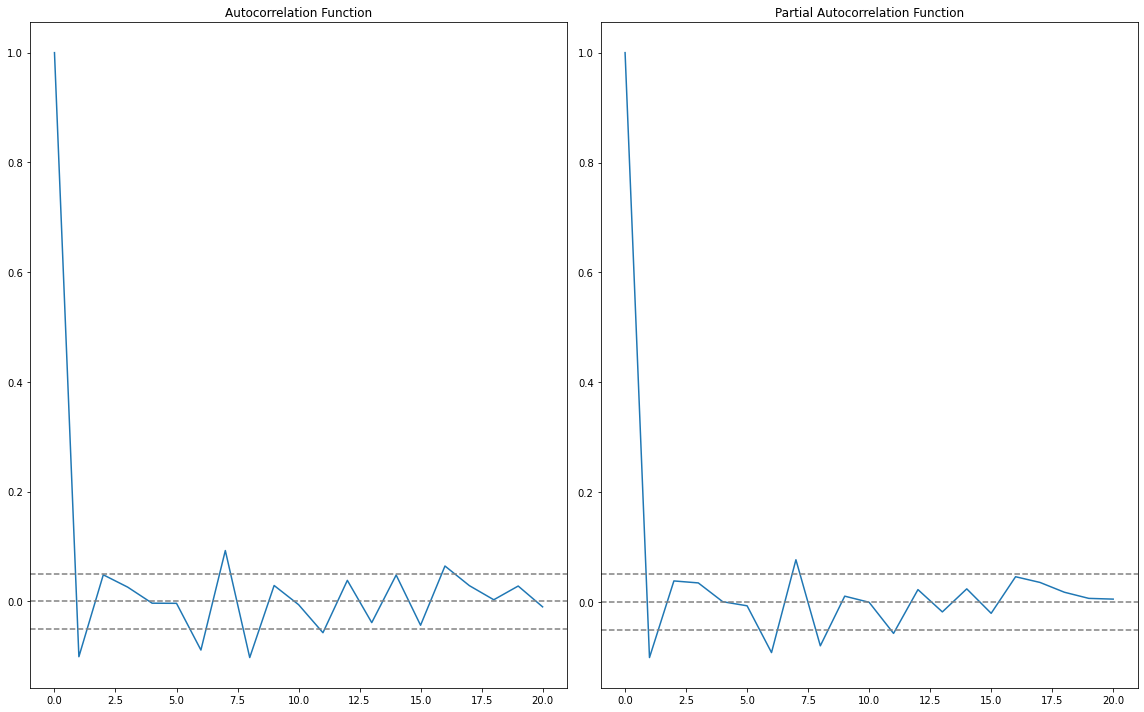

In [ ]:
#Plot ACF: 
plt.figure(figsize=(16,10))
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(data_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(data_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(data_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(data_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Text(0.5, 1.0, 'RSS: 1.2172')

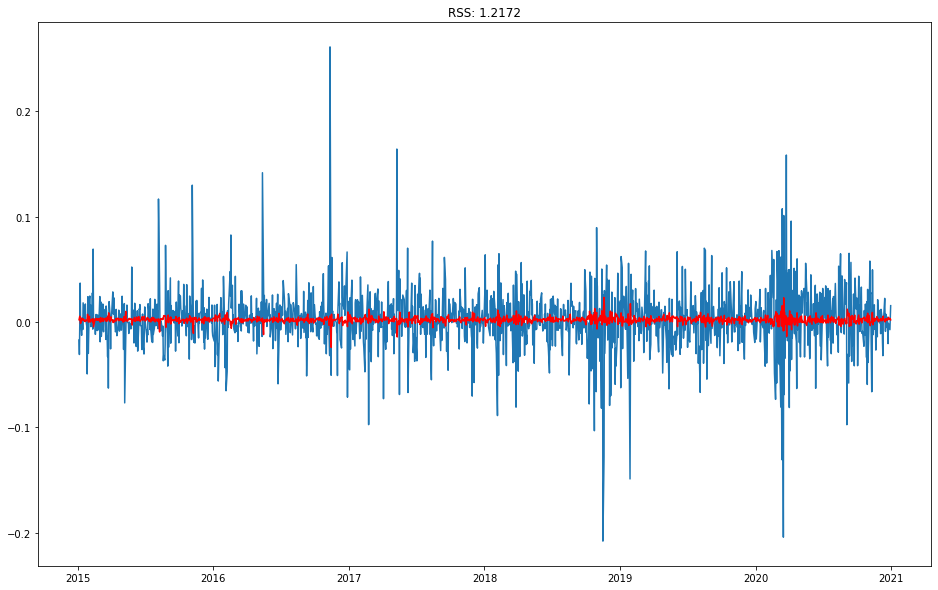

In [ ]:
##AR model
model = ARIMA(data_log, order=(1, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.figure(figsize=(16,10))
plt.plot(data_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-data_log_diff)**2))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Text(0.5, 1.0, 'RSS: 1.2183')

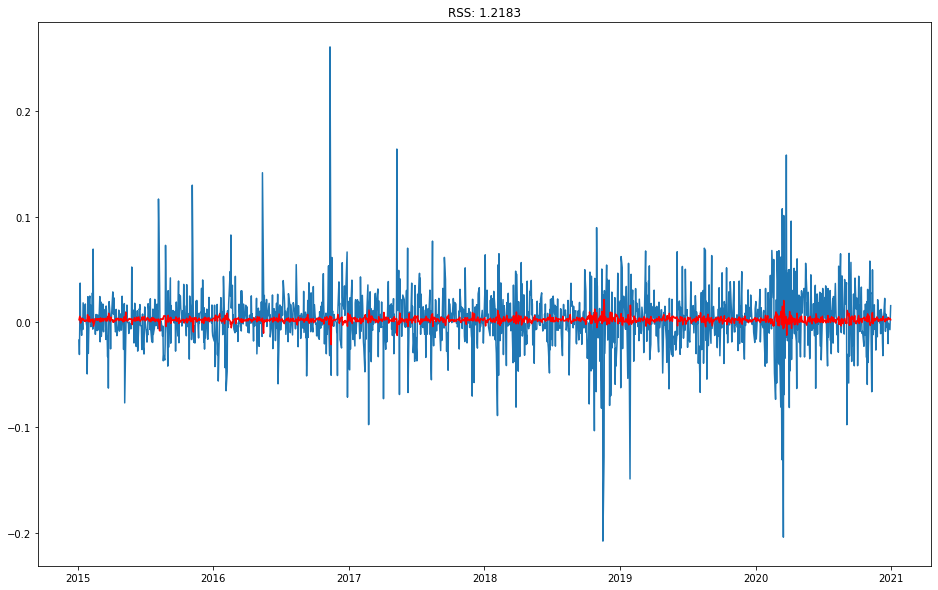

In [ ]:
##MA model
model = ARIMA(data_log, order=(0, 1, 1))  
results_AR = model.fit(disp=-1)  
plt.figure(figsize=(16,10))
plt.plot(data_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-data_log_diff)**2))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Text(0.5, 1.0, 'RSS: 1.2162')

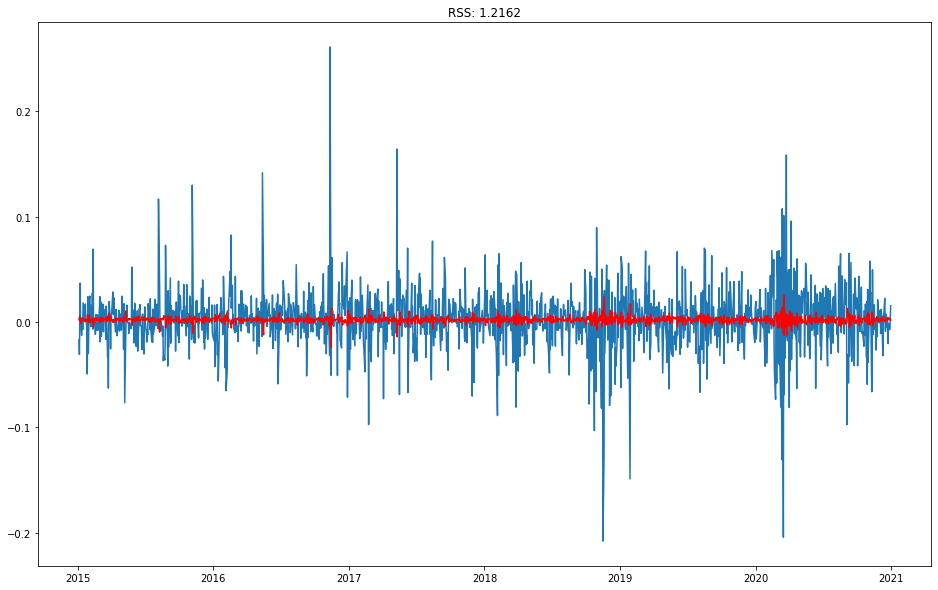

In [ ]:
##combined ARIMA model
model = ARIMA(data_log, order=(1, 1, 1))  
results_ARIMA = model.fit(disp=-1)  
plt.figure(figsize=(16,10))
plt.plot(data_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-data_log_diff)**2))

In [ ]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

Date
2015-01-05    0.002162
2015-01-06    0.004135
2015-01-07    0.005067
2015-01-08    0.002039
2015-01-09   -0.001305
dtype: float64


In [ ]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

Date
2015-01-05    0.002162
2015-01-06    0.006297
2015-01-07    0.011364
2015-01-08    0.013403
2015-01-09    0.012098
dtype: float64


In [ ]:
data_log = pd.DataFrame(data_log)
data_log

,Close
Date,
2015-01-02,3.002211
2015-01-05,2.985177
2015-01-06,2.954389
2015-01-07,2.951780
2015-01-08,2.988708
...,...
2020-12-23,6.254540
2020-12-24,6.253348
2020-12-28,6.246107


In [ ]:
print(pd.__version__)

1.2.4


In [ ]:
!pip install --upgrade pandas

Requirement already up-to-date: pandas in /usr/local/lib/python3.7/dist-packages (1.2.4)


In [ ]:
predictions_ARIMA_log = pd.Series(data_log.iloc[:,0], index=data_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

Date
2015-01-02    3.002211
2015-01-05    2.987339
2015-01-06    2.960686
2015-01-07    2.963144
2015-01-08    3.002110
dtype: float64

Text(0.5, 1.0, 'RMSE: 3661.0498')

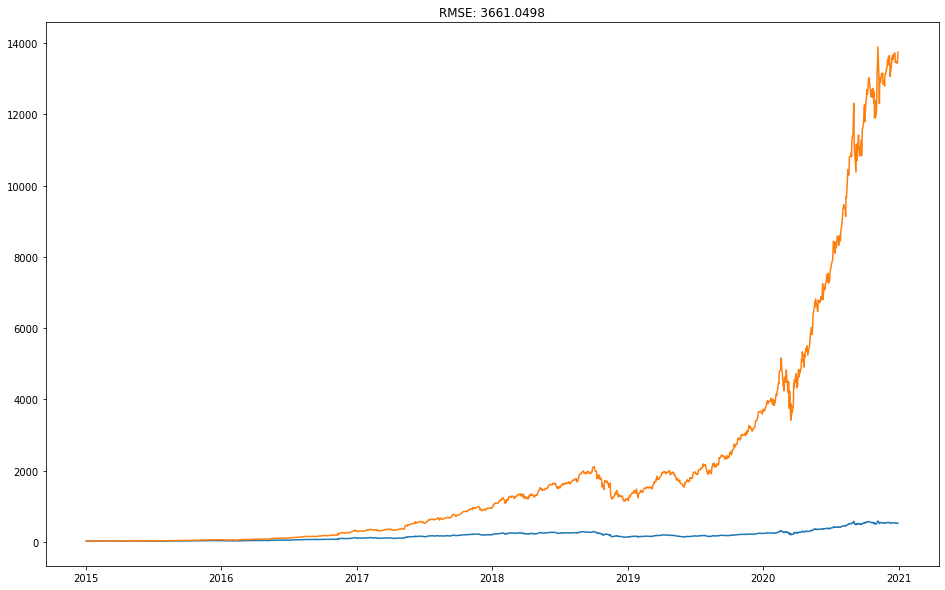

In [ ]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.figure(figsize=(16,10))
plt.plot(close_price)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-close_price)**2)/len(close_price)))

In [ ]:
df = pd.DataFrame(close_price)

In [ ]:
df.head()

In [ ]:
import statsmodels.api as sm

In [ ]:
df['forecast'] = results.predict(start=500,end=600,dynamic=True)
df[['Close','forecast']].plot(figsize=(12,8))

In [ ]:
data_log

,Close
Date,
2015-01-02,3.002211
2015-01-05,2.985177
2015-01-06,2.954389
2015-01-07,2.951780
2015-01-08,2.988708
...,...
2020-12-23,6.254540
2020-12-24,6.253348
2020-12-28,6.246107


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


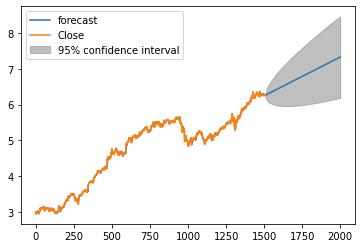

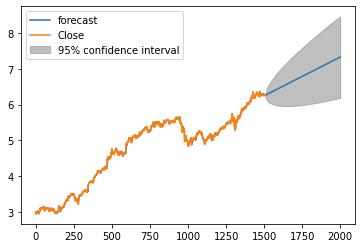

In [ ]:
#plt.figure(figsize=(16,10))
results_ARIMA.plot_predict(1,2000)
#x = results_ARIMA.forecast(steps=490)